# Training of Random Forest Classifier and SVM for Sentiment Prediction

## Prepare data:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, recall_score,precision_score, f1_score
import scipy
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!wget https://www.dropbox.com/s/vm1xl9r68czt1so/all_sent_without_context_new1.csv

/bin/bash: wget: command not found


In [ ]:
df=pd.read_csv("all_sent_without_context_new1.csv",delimiter="|")

/var/folders/ny/51tqt_m57pg0x8vbws59y2880000gn/T/ipykernel_12635/3388946156.py:1: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("all_sent_without_context_new1.csv",delimiter="|")


### Split data set into training and test:

In [ ]:
df=df.dropna(subset=["sentences"])

In [ ]:
train,val = train_test_split(df, test_size=0.2, random_state=42)


In [ ]:
train.shape

(592846, 15)

# Vectorizer with Random Forrests and SVM

In [ ]:
vectorizer = CountVectorizer()

# Fit and transform the text data
X_train = vectorizer.fit_transform(train["sentences"])
X_val = vectorizer.transform(val["sentences"])
#X_test = vectorizer.transform(test["sentences"])
y_train=train[["Sentiment_annot"]]
y_val=val[["Sentiment_annot"]]
#y_test=test[["Sentiment_annot"]]


## Undersampling of the data 
Since the classes are not equally distributed and the majority class (neutral) is significant bigger than classes positive and negative, the data will be undersampled.

In [ ]:
#os = SMOTE()
#X_train_resampled, y_train_resampled = os.fit_resample(X_train, y_train)
pipeline = make_pipeline(RandomUnderSampler())
X_train_resampled, y_train_resampled =  pipeline.fit_resample(X_train, y_train)

In [ ]:
y1=y_train_resampled.reset_index()

In [ ]:
y1.groupby("Sentiment_annot").count()

,index
Sentiment_annot,
negative,53558
neutral,53558
positive,53558


## Training of Random Forest Classifier

In [ ]:
rfc=RandomForestClassifier(random_state=0,min_samples_split= 2, n_estimators=10)

In [ ]:
rfc.fit(X_train_resampled, y_train_resampled)

/var/folders/ny/51tqt_m57pg0x8vbws59y2880000gn/T/ipykernel_12635/2043287029.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
y_pred=rfc.predict(X_val)

In [ ]:
accuracy_score(y_pred,y_val)

0.6984792054624457

### Grid search
We try to find the hyperparameter, with which the model performs best.

In [ ]:
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
rfc = RandomForestClassifier( random_state=0)

In [ ]:
rf_cv = GridSearchCV(estimator = rfc,param_grid=param_grid,  cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_cv.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-pack

/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-pack

/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-pack

/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/model_selection/_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


[CV] END max_depth=None, min_samples_split=2, n_estimators=30; total time=20.8min
[CV] END max_depth=None, min_samples_split=10, n_estimators=10; total time= 3.3min
[CV] END max_depth=None, min_samples_split=10, n_estimators=20; total time= 6.4min
[CV] END .max_depth=10, min_samples_split=2, n_estimators=30; total time=  12.0s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=20; total time=   8.4s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=30; total time=  11.5s
[CV] END max_depth=10, min_samples_split=10, n_estimators=10; total time=   4.3s
[CV] END max_depth=10, min_samples_split=10, n_estimators=20; total time=   7.8s
[CV] END max_depth=10, min_samples_split=10, n_estimators=30; total time=  11.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=20; total time=14.1min
[CV] END max_depth=None, min_samples_split=5, n_estimators=20; total time= 8.7min
[CV] END max_depth=None, min_samples_split=10, n_estimators=20; total time= 6.6min
[CV] END ..max_dept

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30]},
             verbose=2)

In [ ]:
print(rf_cv.best_params_)
print(rf_cv.best_score_)


{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 30}
0.7485094041350809


### Training model with best parameter

In [ ]:
rfc=RandomForestClassifier(max_depth=None,random_state=0,min_samples_split= 10, n_estimators=30)

In [ ]:
rfc.fit(X_train_resampled, y_train_resampled)

/var/folders/ny/51tqt_m57pg0x8vbws59y2880000gn/T/ipykernel_12635/2043287029.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(min_samples_split=10, n_estimators=30, random_state=0)

### Prediction and testing

In [ ]:
y_pred=rfc.predict(X_val)

In [ ]:
print("Accuracy: ",accuracy_score(y_pred,y_val), "Recall: ",recall_score(y_pred,y_val,average=None ),
      "Precision: ", precision_score(y_pred,y_val,average=None), "F1-score: ", f1_score(y_pred,y_val,average=None))

Accuracy:  0.7358243597009689 Recall:  [0.39333408 0.94070485 0.54892049] Precision:  [0.78593318 0.71951919 0.77311308] F1-score:  [0.52428201 0.81537814 0.64200731]


### Finding of sentiment of every sentence

In [ ]:
X=df["sentences"]
X=vectorizer.transform(X)

In [ ]:
y_new=rfc.predict_proba(X)
y_new=pd.DataFrame(y_new,columns=["negative","neutral","positive"])

In [ ]:
y_new

,negative,neutral,positive
0,0.098611,0.195060,0.706329
1,0.148116,0.142156,0.709728
2,0.294413,0.062583,0.643004
3,0.318561,0.179484,0.501956
4,0.264627,0.325966,0.409407
...,...,...,...
741053,0.119522,0.464053,0.416425
741054,0.095909,0.712980,0.191111
741055,0.393320,0.413987,0.192693
741056,0.215037,0.328758,0.456205


In [ ]:
df["polarity"]=y_new.apply(lambda x: (x.positive-x.negative)/2+0.5,axis=1) ##reskaling for finding the sentiment between 0 to 1

In [ ]:
avg=df.groupby(["company","internal"])["polarity"].mean()

In [ ]:
avg=avg.reset_index().pivot(index='company', columns='internal', values='polarity')

In [ ]:
avg["Diff"]=avg[1]-avg[0]

<AxesSubplot: xlabel='company'>

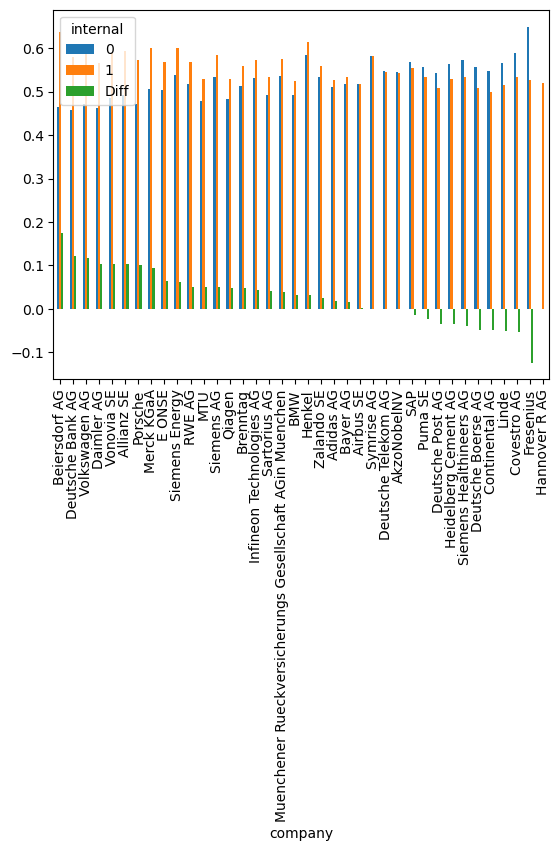

In [ ]:
avg.sort_values(by="Diff",ascending=False).plot(kind="bar")

## SVM

### Hyperparameter tuning

In [ ]:
param_grid = {'C': [0.1,1, 10, 100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
svm_clf = svm.SVC()

sample_size = 40000 #reduce number of samplece in order to preserve the performance of SVM
sparse_X = pd.DataFrame.sparse.from_spmatrix(X_train_resampled)
stratified_sample_X = sparse_X.sample(n=sample_size,  random_state=42)
stratified_sample_y = y_train_resampled.loc[stratified_sample_X.index]
stratified_sample_X=scipy.sparse.csr_matrix(stratified_sample_X.values)

In [ ]:
stratified_sample_X.shape

(40000, 205849)

In [ ]:
svm_cv = GridSearchCV(estimator = svm_clf,param_grid=param_grid,  cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
svm_cv.fit(stratified_sample_X, stratified_sample_y)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-v

/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-v

/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-v

/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-v

/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-v

[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time= 5.6min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 9.1min
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time= 9.2min
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time= 4.8min
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time= 8.3min
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time= 7.9min
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time= 8.7min
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time= 5.2min
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time= 5.3min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=18.8min
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time= 6.3min
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time= 5.5min
[CV] END ...................

/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=26.0min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 7.8min
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time= 8.0min
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time= 8.3min
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=24.7min
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=22.9min
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time= 7.8min
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time= 5.4min
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time= 5.5min
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=22.0min
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=18.9min
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time= 5.9min
[CV] END ...................

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
print(svm_cv.best_params_)
print(svm_cv.best_score_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.7661250159572573


### Training of the model with best parameter.

In [ ]:
svm_clf = svm.SVC(C=10,kernel="rbf",gamma=0.01,probability=True)
svm_clf=svm_clf.fit(stratified_sample_X, stratified_sample_y)

/Users/paulina/opt/anaconda3/envs/mlp/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Prediction an testing

In [ ]:
y_pred=svm_clf.predict(X_val)

In [ ]:
print("Accuracy: ",accuracy_score(y_pred,y_val), "Recall: ",recall_score(y_pred,y_val,average=None ),
      "Precision: ", precision_score(y_pred,y_val,average=None), "F1-score: ", f1_score(y_pred,y_val,average=None))

Accuracy:  0.7735540981836828 Recall:  [0.42387501 0.93788699 0.61459971] Precision:  [0.77868301 0.77074143 0.7816358 ] F1-score:  [0.54893695 0.84613875 0.68812623]


### Finding of the sentiment

In [ ]:
X=df["sentences"]
X=vectorizer.transform(X) # vectorize whole dataset

In [ ]:
y_new=svm_clf.predict_proba(X)
y_new=pd.DataFrame(y_new,columns=["negative","neutral","positive"])

In [ ]:
df["polarity"]=y_new.apply(lambda x: (x.positive-x.negative)/2+0.5,axis=1)

<AxesSubplot: xlabel='company'>

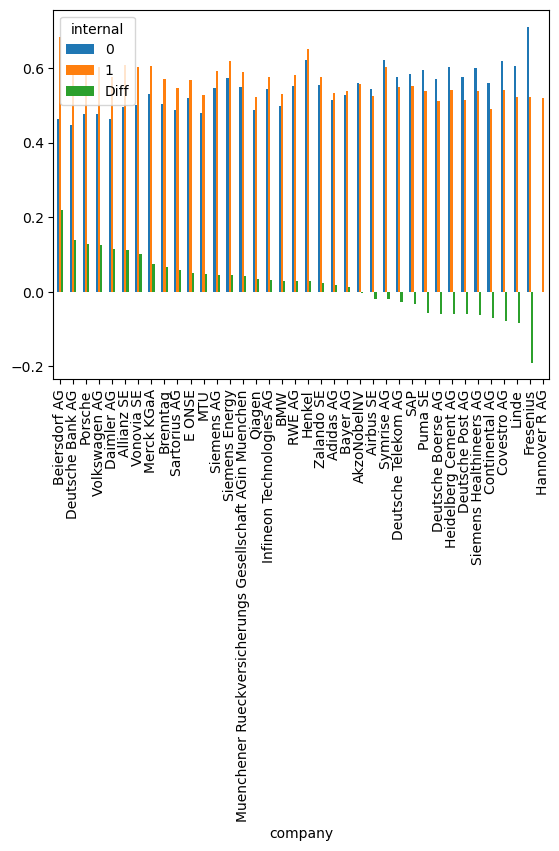

In [ ]:
avg=df.groupby(["company","internal"])["polarity"].mean()
avg=avg.reset_index().pivot(index='company', columns='internal', values='polarity')
avg["Diff"]=avg[1]-avg[0]
avg.sort_values(by="Diff",ascending=False).plot(kind="bar")